## Machine Learning HW3
Siméon Gaumart . 0845209

# Problem 2: 

In [26]:
# use make_moons to generate data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

Enter the total number of data:1000


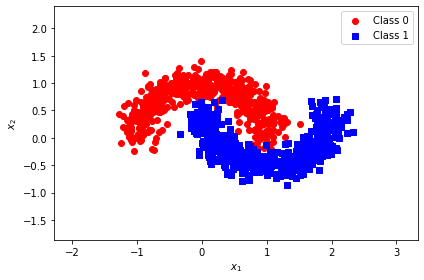

In [27]:
nb=input("Enter the total number of data:")
try:
    nb=int(nb)
except:
    print(str(nb)+" is not an integer. Automatic total number of data : 100")
    nb=100

# generate raw data
X, y = make_moons(n_samples=nb, noise=0.15, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')
plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [29]:
# generate training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [30]:
#  Standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
import numpy as np
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# question a :

[KNN] (K=11 metric=euclidian)
Misclassified samples: 4
Accuracy: 0.98


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


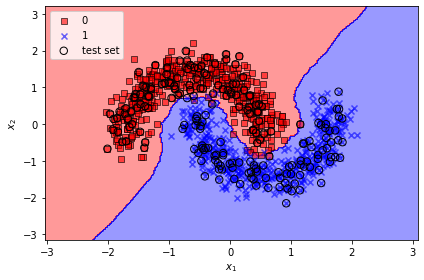

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski') 

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN] (K=11 metric=euclidian)')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# question b :

[SVM] (kernel=rbf random_state=0 gamma=0.2 C=10.0)
Misclassified samples: 4
Accuracy: 0.98


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


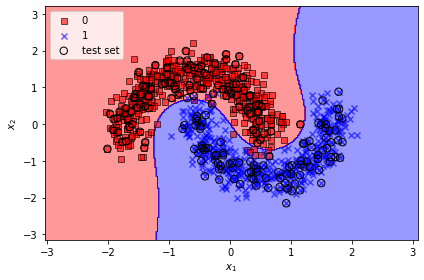

In [36]:
from sklearn.svm import SVC

svm1 = SVC(kernel='rbf',random_state=0,gamma=0.2,C=10.0) 

svm1.fit(X_train_std, y_train)
y_pred = svm1.predict(X_test_std)
print('[SVM] (kernel=rbf random_state=0 gamma=0.2 C=10.0)')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm1 classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm1, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# question c :

[SVM] (kernel=linear random_state=0 C=1000.0)
Misclassified samples: 25
Accuracy: 0.88


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


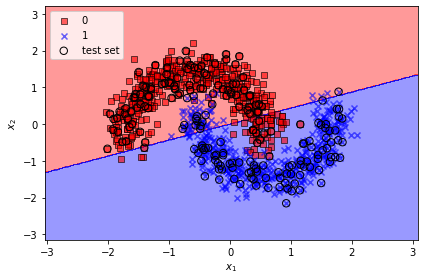

In [37]:
from sklearn.svm import SVC

svm2 = SVC(kernel='linear',random_state=0,C=1000.0) 

svm2.fit(X_train_std, y_train)
y_pred = svm2.predict(X_test_std)
print('[SVM] (kernel=linear random_state=0 C=1000.0)')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm2 classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm2, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# question d :

[SVM] (kernel=sigmoid)
Misclassified samples: 58
Accuracy: 0.71


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


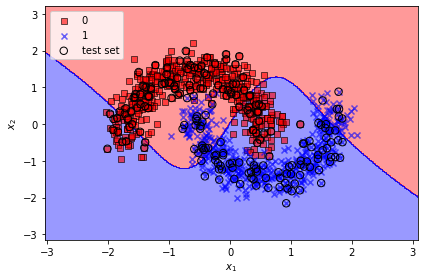

In [38]:
from sklearn.svm import SVC

svm3 = SVC(kernel='sigmoid') 

svm3.fit(X_train_std, y_train)
y_pred = svm3.predict(X_test_std)
print('[SVM] (kernel=sigmoid)')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for svm3 classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm3, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# question e :

The best results are :

Misclassified samples: 2
Accuracy: 0.99 

[SVM] (random_state=0 C=1000.0 gamma=0.1)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


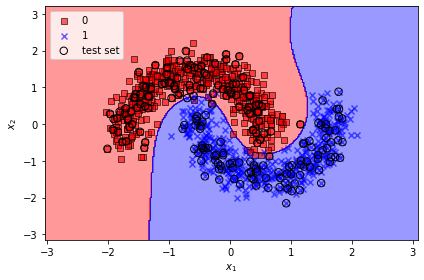

[SVM] (random_state=0 C=1000.0 gamma=1.0)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


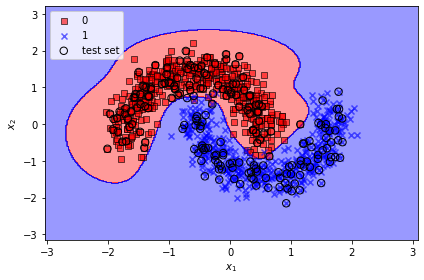

[SVM] (random_state=0 C=10000.0 gamma=0.1)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


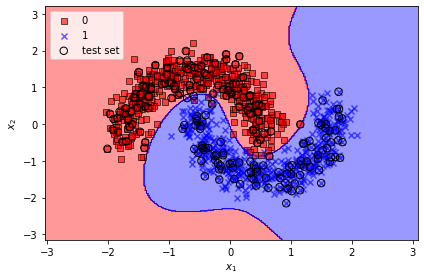

In [41]:
from sklearn.svm import SVC
C=[0.1,1.0,10.0,100.0,1000.0,10000.0]
gamma=[0.00001,0.0001,0.001,0.01,0.1,1.0]
best_comb=[]
min_misclass=len(y_test)+1


for i in range (len(C)):
    for j in range (len(gamma)):
        svm4 = SVC(random_state=0,C=C[i],gamma=gamma[j]) 

        svm4.fit(X_train_std, y_train)
        y_pred = svm4.predict(X_test_std)
        
        misclass=(y_test != y_pred).sum() 
        if misclass<min_misclass:
            max_accu=accuracy_score(y_test, y_pred)
            min_misclass=misclass
            best_comb=[[C[i],gamma[j],svm4]]
        elif misclass==min_misclass:
            best_comb.append([C[i],gamma[j],svm4])
        

        
print("The best results are :\n")
print('Misclassified samples: %d' % min_misclass)
print('Accuracy: %.2f \n' % max_accu)

for i in range(len(best_comb)):
    print('[SVM] (random_state=0 C={} gamma={})'.format(best_comb[i][0],best_comb[i][1]))

    # plot decision regions for svm4 classifier
    plot_decision_regions(X_combined_std, y_combined,
                          classifier=best_comb[i][2], 
                          test_idx=range(y_train.size,
                                         y_train.size + y_test.size))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# question f :

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Logistic Regression] (C=1000.0 random_state=0 solver=liblinear)
Misclassified samples: 26
Accuracy: 0.87


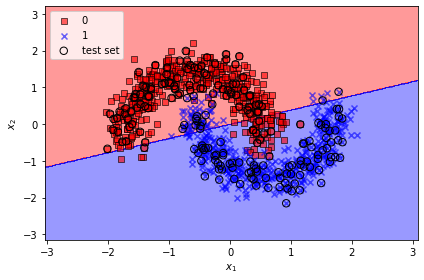

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1000.0,random_state=0,solver='liblinear') 

LR.fit(X_train_std, y_train)
y_pred = LR.predict(X_test_std)
print('[Logistic Regression] (C=1000.0 random_state=0 solver=liblinear)')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for LR classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=LR, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()